This notebook plots a supplemental figure that shows the profiled secretomes of PBMCs treated with varying dosages of LPS.
We visualize and compare both Luminex and nELISA assays for secretome profiling here.

In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))
suppressPackageStartupMessages(suppressWarnings(library(dplyr)))
suppressPackageStartupMessages(suppressWarnings(library(tidyr)))
suppressPackageStartupMessages(suppressWarnings(library(arrow)))


# Min- Max Normalization data

In [2]:
validation_data_path_min_max <- file.path("..","..","..","2.Nomic_nELISA_Analysis","Data","clean","validation","nELISA_luminex_validation_data_min_max.parquet")
figures_path <- file.path("..","figures")
# make the figure path
if (!dir.exists(figures_path)) {
    dir.create(figures_path)
}
output_figure_path_min_max <- file.path("..","figures","validation_plot_min_max.png")
validation_data <- arrow::read_parquet(validation_data_path_min_max)
head(validation_data)

LPS_concentration,data_type,cytokine,concentration
<chr>,<chr>,<chr>,<dbl>
0ng/mL,nELISA,CCL2,1.00000000
0ng/mL,nELISA,CCL2,0.07997690
0ng/mL,nELISA,CCL2,0.34532328
0ng/mL,nELISA,CCL2,0.07295152
0ng/mL,nELISA,CCL2,0.08545915
5ng/mL,nELISA,CCL2,0.01330579


In [3]:
# replace ng/ml with "" in LPS concentration
validation_data$LPS_concentration <- gsub("ng/mL", "", validation_data$LPS_concentration)
# make LPS concentration a factor with levels in ascending order
validation_data$LPS_concentration <- factor(validation_data$LPS_concentration, levels = c("0", "5", "100", "2000"))

In [4]:
# drop TNF alpha 
validation_data <- validation_data %>% filter(cytokine != "TNF_alpha")
# rename each cytokine to its full name
validation_data$cytokine <- recode(
    validation_data$cytokine, 
    "CCL2" = "CCL2",
    "GM-CSF" = "GM-CSF",
    "IFN_gamma" = "IFN-γ",
    "IL-1_alpha" = "IL-1α",
    "IL-1_beta" = "IL-1β",
    "IL-12_p40" = "IL-12p40"
)

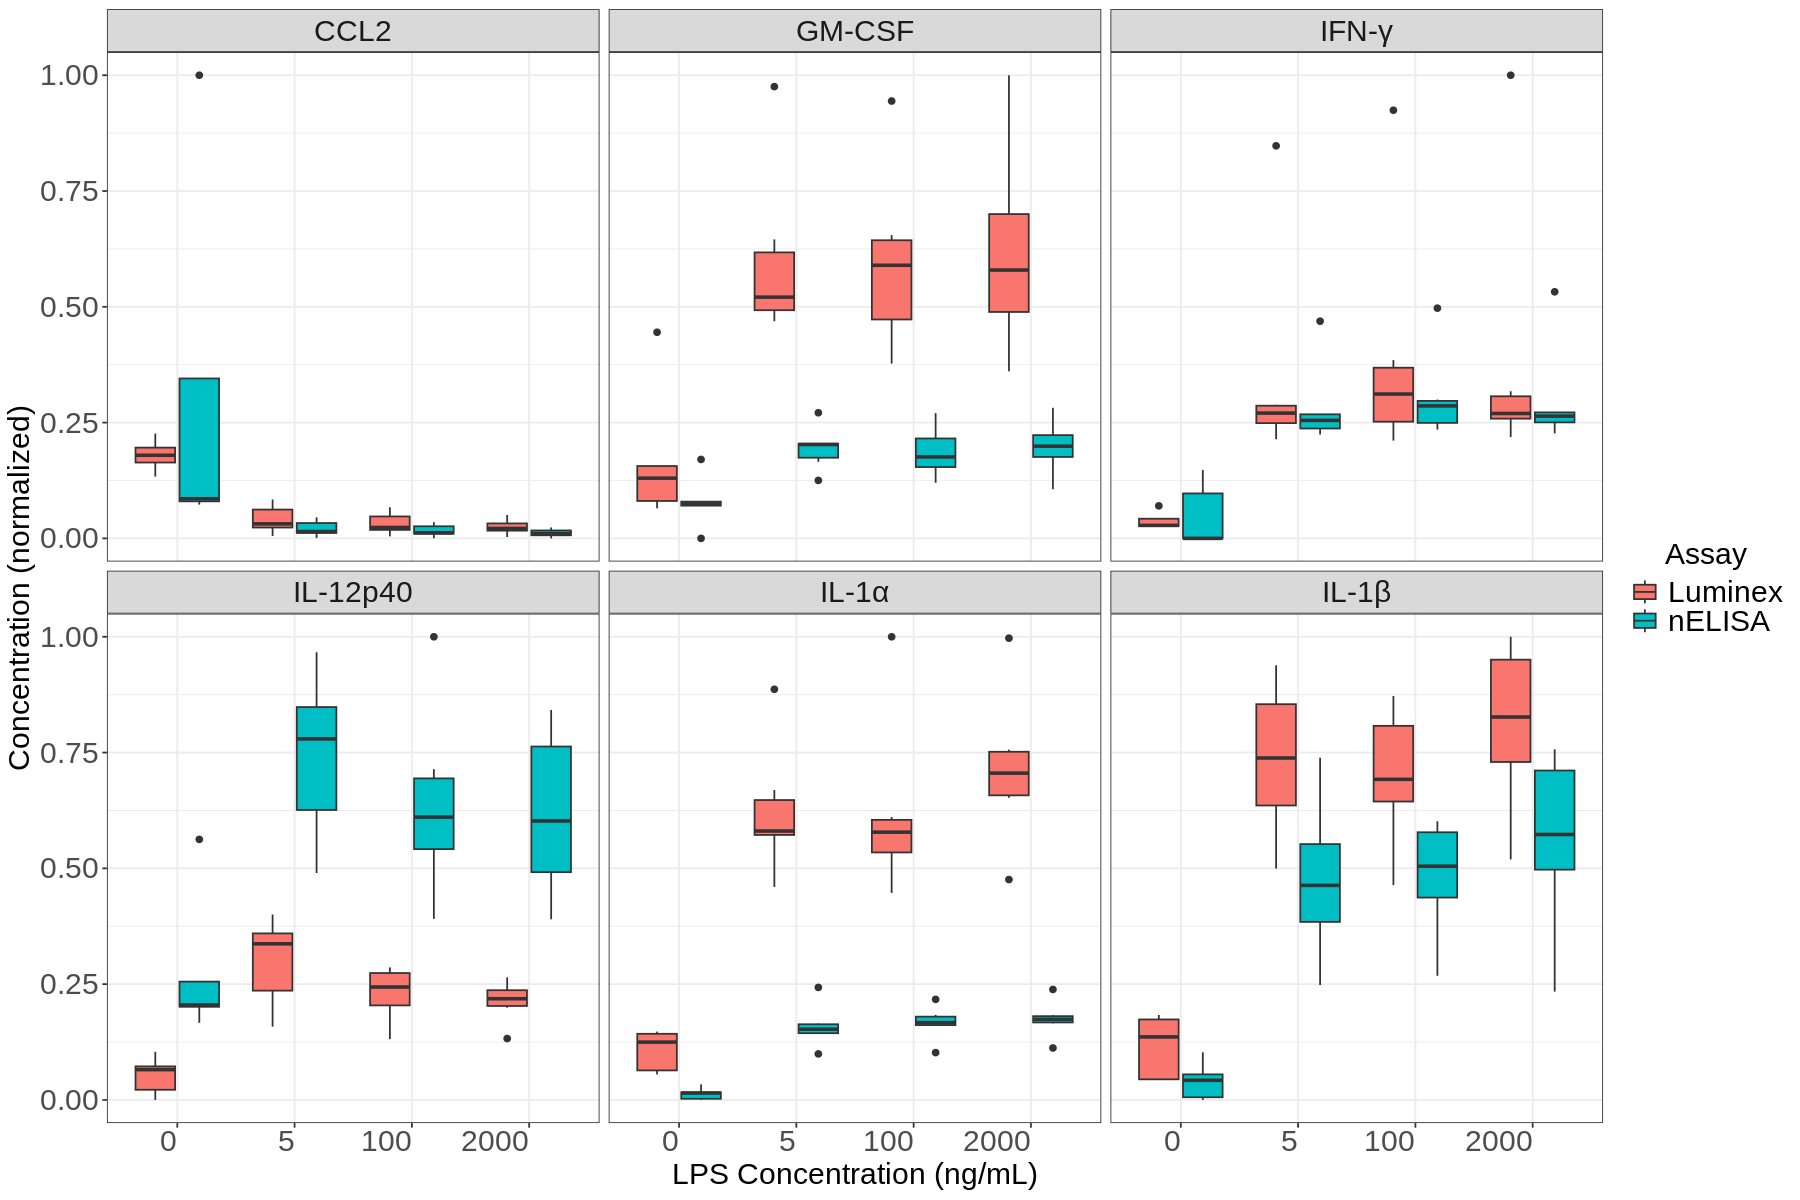

In [5]:
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

text_size_1 <- 18
text_size_2 <- 14
# Plot the data
validation_plot <- (
    ggplot(validation_data, aes(x = LPS_concentration , y = concentration, fill = data_type))
    + geom_boxplot()
    + theme_bw()
    + labs(
        x = "LPS Concentration (ng/mL)",
        y = "Concentration (normalized)",
        legend = "Assay"
    )
    # facet by cytokine with 2 rows
    + facet_wrap(~cytokine, nrow = 2)
    # change size of text
    + theme(
        axis.title = element_text(size = text_size_1, hjust = 0.5),
        axis.text = element_text(size = text_size_1),
        legend.text = element_text(size = text_size_1),
        legend.title = element_text( size = text_size_1, hjust = 0.5),
        axis.text.x = element_text(hjust = 1, size = text_size_1),
        axis.text.y = element_text(hjust = 1, size = text_size_1)
    )
    + guides(fill = guide_legend(title = "Assay", size = text_size_1))
    # facet labels size
    + theme(strip.text = element_text(size = text_size_1))


)
ggsave(output_figure_path_min_max, validation_plot, width = width, height = height)
validation_plot

# Raw pg/ml Normalization data

In [6]:
validation_data_path <- file.path("..","..","..","2.Nomic_nELISA_Analysis","Data","clean","validation","nELISA_luminex_validation_data.parquet")
figures_path <- file.path("..","figures")
# make the figure path
if (!dir.exists(figures_path)) {
    dir.create(figures_path)
}
output_figure_path <- file.path("..","figures","validation_plot_raw_values.png")
validation_data <- arrow::read_parquet(validation_data_path)
head(validation_data)

LPS_concentration,data_type,cytokine,concentration
<chr>,<chr>,<chr>,<dbl>
0ng/mL,nELISA,CCL2,11060.8200
0ng/mL,nELISA,CCL2,903.1002
0ng/mL,nELISA,CCL2,3832.7160
0ng/mL,nELISA,CCL2,825.5349
0ng/mL,nELISA,CCL2,963.6282
5ng/mL,nELISA,CCL2,167.0029


In [7]:
# replace ng/ml with "" in LPS concentration
validation_data$LPS_concentration <- gsub("ng/mL", "", validation_data$LPS_concentration)
# make LPS concentration a factor with levels in ascending order
validation_data$LPS_concentration <- factor(validation_data$LPS_concentration, levels = c("0", "5", "100", "2000"))

In [8]:
# drop TNF alpha 
validation_data <- validation_data %>% filter(cytokine != "TNF_alpha")
# rename each cytokine to its full name
validation_data$cytokine <- recode(
    validation_data$cytokine, 
    "CCL2" = "CCL2",
    "GM-CSF" = "GM-CSF",
    "IFN_gamma" = "IFN-γ",
    "IL-1_alpha" = "IL-1α",
    "IL-1_beta" = "IL-1β",
    "IL-12_p40" = "IL-12p40"
)

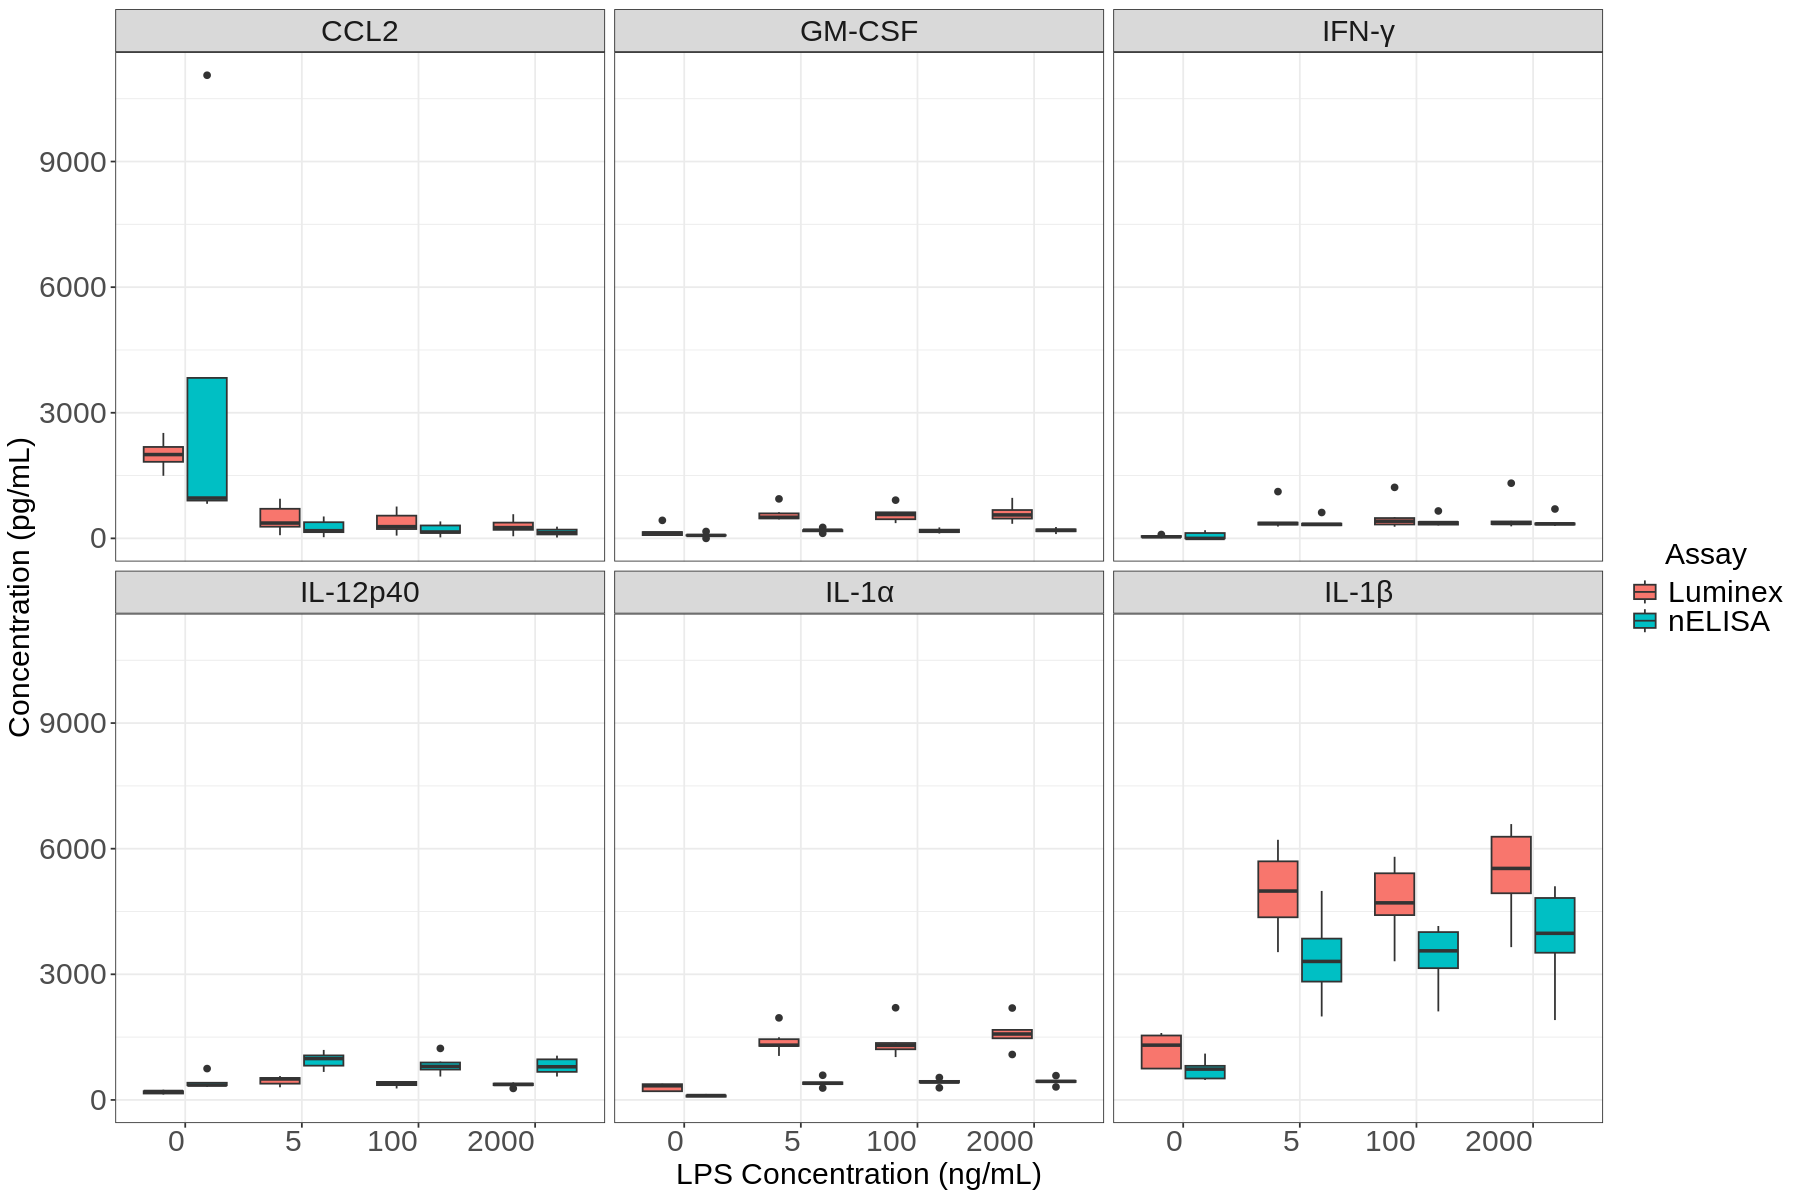

In [9]:
width <- 15
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

text_size_1 <- 18
text_size_2 <- 14
# Plot the data
validation_plot <- (
    ggplot(validation_data, aes(x = LPS_concentration , y = concentration, fill = data_type))
    + geom_boxplot()
    + theme_bw()
    + labs(
        x = "LPS Concentration (ng/mL)",
        y = "Concentration (pg/mL)",
        legend = "Assay"
    )
    # facet by cytokine with 2 rows
    + facet_wrap(~cytokine, nrow = 2)
    # change size of text
    + theme(
        axis.title = element_text(size = text_size_1, hjust = 0.5),
        axis.text = element_text(size = text_size_1),
        legend.text = element_text(size = text_size_1),
        legend.title = element_text( size = text_size_1, hjust = 0.5),
        axis.text.x = element_text(hjust = 1, size = text_size_1),
        axis.text.y = element_text(hjust = 1, size = text_size_1)
    )
    + guides(fill = guide_legend(title = "Assay", size = text_size_1))
    # facet labels size
    + theme(strip.text = element_text(size = text_size_1))


)
ggsave(output_figure_path, validation_plot, width = width, height = height)

validation_plot